# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load IRIS dataset

In [2]:
iris = datasets.load_iris()

In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

#### As you can see the dataset is in the form of an object similar to a `dictionay`. What are the `keys` of the dictionary?

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#### To have better understanding of the dataset, let's print it in tabular form.

In [4]:

df = pd.DataFrame(data=iris['data'], columns=iris['feature_names']) 
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Figure below illustrates the features and target labels for iris dataset. 

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/iris.png" width="500" hight="300" />

#### What is the value of the key `data`? Assign the value to a variable `X`

In [ ]:
X = iris['data']

#### What is the `shape` of `X`?

In [6]:
print(X.shape)

(150, 4)


#### What is the value of the key `target`? Assign the value to a variable `y`

In [7]:
y = iris['target']

#### What is the `shape` of `y`?

In [9]:
print(y.shape)

(150,)


#### What is the value of the key `target_names`? Assign the value to a variable `target_names`

In [10]:
target_names = iris['target_names']

#### What is the value of the key `feature_names`? Assign the value to a variable `feature_names`

In [11]:
feature_names = iris['feature_names']

# Exploring and looping through the dataset

#### Print the 5th datapoint in your dataset `X`

In [12]:
print(X[4])

[5.  3.6 1.4 0.2]


#### Print the features and target label of flower 1 to 5.

In [13]:
for i in range(5):
    print(f"Flower {i+1}:")
    print(f"  Features: {X[i]}")
    print(f"  Target: {y[i]}")

Flower 1:
  Features: [5.1 3.5 1.4 0.2]
  Target: 0
Flower 2:
  Features: [4.9 3.  1.4 0.2]
  Target: 0
Flower 3:
  Features: [4.7 3.2 1.3 0.2]
  Target: 0
Flower 4:
  Features: [4.6 3.1 1.5 0.2]
  Target: 0
Flower 5:
  Features: [5.  3.6 1.4 0.2]
  Target: 0


#### Iterate over all datapoints in `X` and calculate the `area` of Sepal and Petal for each flower in the dataset.

`Sepal area` = `Sepal length` * `Sepal width`

`Petal area` = `Petal length` * `Petal width`

In [14]:
print("Features of flowers 1 to 5:")
print(X[:5])
print("\nTarget labels of flowers 1 to 5:")
print(y[:5])

Features of flowers 1 to 5:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target labels of flowers 1 to 5:
[0 0 0 0 0]


#### Find the `max`, `min`, `mean` and `median` value of each feature in the dataset `X`

Helper: you can iterate through the columns of the dataset and use the `np.max()`, `np.min()`,`np.mean()`, and `np.median()` functions to find the required values. or the better way is to use `axis` parameter of the `np.max()`, `np.min()`,`np.mean()`, and `np.median()` functions.

In [17]:
max_values = np.max(X, axis=0)
min_values = np.min(X, axis=0)
mean_values = np.mean(X, axis=0)
median_values = np.median(X, axis=0)

print("Max values for each feature:", max_values)
print("Min values for each feature:", min_values)
print("Mean values for each feature:", mean_values)
print("Median values for each feature:", median_values)

print("\nDescriptive statistics for each feature:")
for i, feature in enumerate(['sepal length', 'sepal width', 'petal length', 'petal width']):
    print(f"--- {feature} ---")
    print(f"  Max:    {max_values[i]:.2f}")
    print(f"  Min:    {min_values[i]:.2f}")
    print(f"  Mean:   {mean_values[i]:.2f}")
    print(f"  Median: {median_values[i]:.2f}")


Max values for each feature: [7.9 4.4 6.9 2.5]
Min values for each feature: [4.3 2.  1.  0.1]
Mean values for each feature: [5.84333333 3.05733333 3.758      1.19933333]
Median values for each feature: [5.8  3.   4.35 1.3 ]

Descriptive statistics for each feature:
--- sepal length ---
  Max:    7.90
  Min:    4.30
  Mean:   5.84
  Median: 5.80
--- sepal width ---
  Max:    4.40
  Min:    2.00
  Mean:   3.06
  Median: 3.00
--- petal length ---
  Max:    6.90
  Min:    1.00
  Mean:   3.76
  Median: 4.35
--- petal width ---
  Max:    2.50
  Min:    0.10
  Mean:   1.20
  Median: 1.30


# Plotting the data

#### `Box plot` of all features

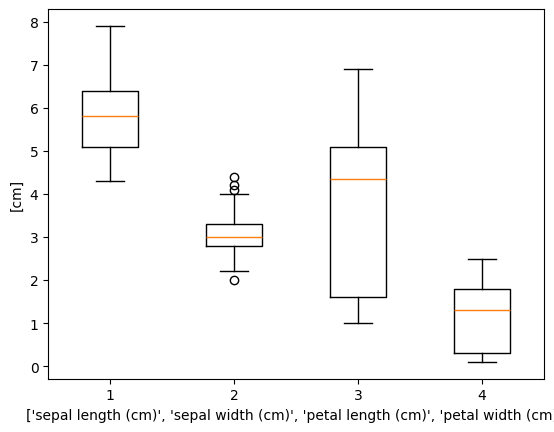

In [18]:
plt.figure()
plt.boxplot(X)
plt.ylabel("[cm]")
plt.xlabel(feature_names)
plt.show()

#### Histogram of each feature

#### Plot the histogram of each feature. 

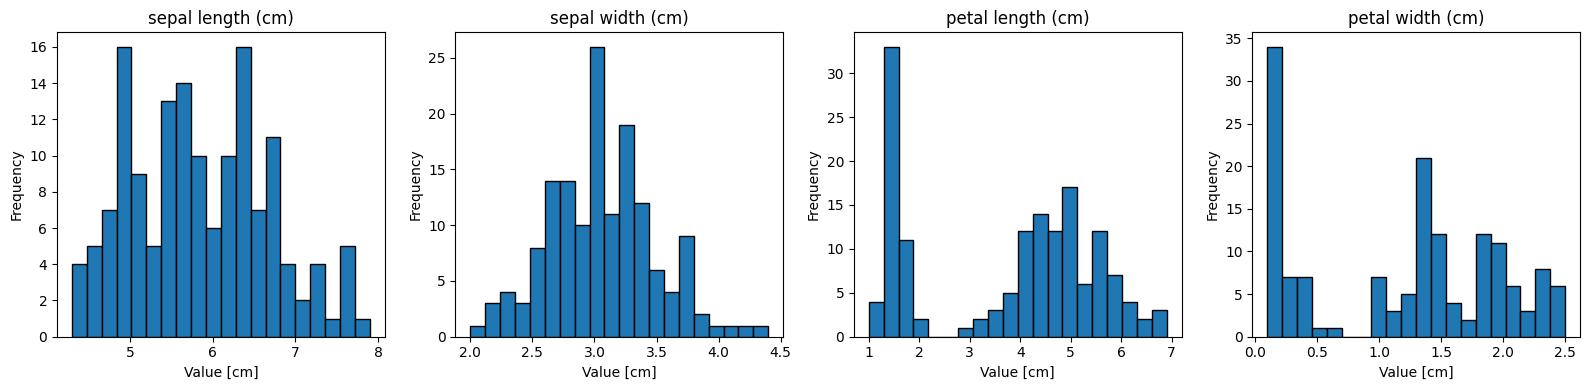

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=len(feature_names), figsize=(16, 4))

for i, feature_name in enumerate(feature_names):
    axes[i].hist(X[:, i], bins=20, edgecolor='k')
    axes[i].set_title(feature_name)
    axes[i].set_xlabel("Value [cm]")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


#### Scatter plot for each pair of features

Plot the scater plot for the pair of first and second features 
```python
(X[:,0], X[:,1]) 
```
Dont't forget to `label` your axes.

hint: use `c=y` inside the scatter plot to color the points based on the target labels.
 

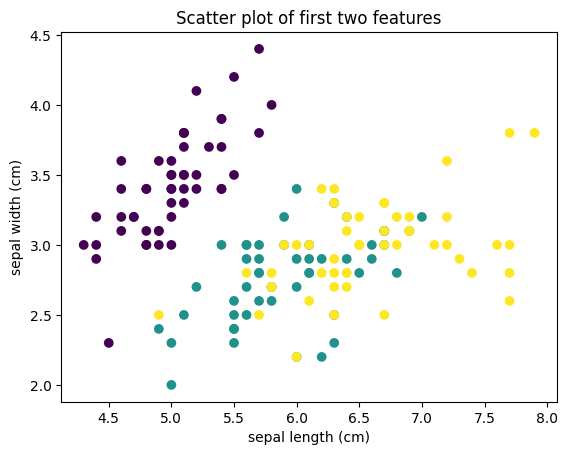

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Scatter plot of first two features")

plt.show()


(Optional) The plots shown above do not have legend. To add legend to the plot, you can use the following code snippet.

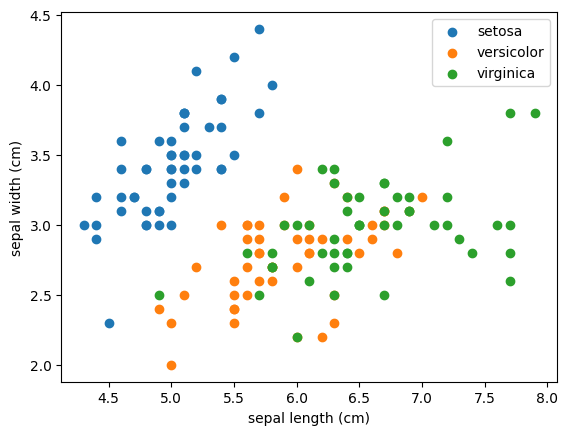

In [11]:
def plot_pair_with_legned(x1, x2, x1_label , x2_label, y):
    plt.figure()
    for i, target_name in enumerate(iris.target_names):
        plt.scatter(x1[y == i], x2[y == i], label=target_name)
    
    plt.xlabel(x1_label) 
    plt.ylabel(x2_label) 
    plt.legend()
    plt.show()

plot_pair_with_legned(X[:,0], X[:,1], feature_names[0], feature_names[1], y)

#### Write a function called plot_pairwise that takes the pair of feaure and their labels and plot the scatter plot.

In [21]:
def plot_pair(X1, X2, x1_label , x2_label, y):
    ...

#### Use plot_pari functions and plot the scatter plot for all pairs of features.
```python
X[:,0], X[:,1], 'Sepal Length', 'Sepal Width'
X[:,0], X[:,2], 'Sepal Length', 'Petal Length'
X[:,0], X[:,3], 'Sepal Length', 'Petal Width'
X[:,1], X[:,2], 'Sepal Width', 'Petal Length'
X[:,1], X[:,3], 'Sepal Width', 'Petal Width'
X[:,2], X[:,3], 'Petal Length', 'Petal Width'
```

In [9]:
#your code here

# K Nearest Neighbors (KNN) 

## Euclidean Distance (2D)

In geometry, the **Euclidean distance** is the straight-line distance between two points. 

Given two points $ P(x_1, y_1) $ and $ Q(x_2, y_2)$ in a 2D plane, the Euclidean distance between them is calculated  as follows:

$
d(P, Q) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/figure.png" width="400" hight="300" />

#### Example (2D)

Let's say we have two points:
- $ P(2, 2) $
- $ P_2(5, 5) $

$
d(P_1, P_2) = \sqrt{(2 - 5)^2 + (2 - 5)^2}= \sqrt{18} \approx 4.2
$

We can calculate the distance between these two points.

In [14]:
P = np.array([2, 2])
Q = np.array([5, 5])
distance = np.sqrt(np.sum((P - Q)**2))
distance

np.float64(4.242640687119285)


#### Example (3 Dimensions)

Consider two points in 3D space:
- $ P_1(1, 2, 3) $
- $ P_2(4, 0, 8) $

We can calculate the Euclidean distance as follows:

$
d(P_1, P_2) = \sqrt{(4 - 1)^2 + (0 - 2)^2 + (8 - 3)^2}
$

$
d(P_1, P_2) = \sqrt{3^2 + (-2)^2 + 5^2} = \sqrt{9 + 4 + 25} = \sqrt{38} \approx 6.16
$

In [22]:
# Define two points in 3D space
P1 = np.array([1, 2, 3])
P2 = np.array([4, 0, 8])

# Calculate the Euclidean distance
distance = np.sqrt(np.sum((P2 - P1)**2))

print(f'The Euclidean distance between P1 and P2 is: {distance:.2f}')

The Euclidean distance between P1 and P2 is: 6.16


#### Write a function that get two np arrays `P` and `Q` and return the Euclidean distance between them.


In [16]:
def straight_line_distance(P, Q):
    ...

## KNN Algorithm Steps

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/knn2.jpg" width="600" hight="100" /> 

# Implementing KNN 

### 0 - Look at the data - Splitting the data into training and testing sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#### What is the `shape` of `X_train`, `X_test`, `y_train`, `y_test`?

### 1 - Calculate distances

#### Take one sample from test set and find the distance between this sample and all samples in the training set. In addition to the distance, you need to store the index of the sample in the training set. 

#### So for exaple if the distance between the test sample and the 5th sample in the training set is 3.5, you need to store (5, 3.5).

In [24]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have the Iris dataset loaded into X and y
# X = iris['data']
# y = iris['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Now, your original code will run without error
test_instance = X_test[0]
distances = []

for i in range(len(X_train)):
    training_sample = X_train[i]
    distance = np.sqrt(np.sum((test_instance - training_sample)**2))
    distances.append((i, distance))

print(distances)


[(0, np.float64(0.8124038404635955)), (1, np.float64(1.438749456993816)), (2, np.float64(1.0535653752852738)), (3, np.float64(3.3674916480965473)), (4, np.float64(1.8601075237738276)), (5, np.float64(0.9746794344808963)), (6, np.float64(3.6537651812890224)), (7, np.float64(3.823610858861032)), (8, np.float64(1.1575836902790226)), (9, np.float64(0.8602325267042631)), (10, np.float64(3.5735136770411273)), (11, np.float64(1.2999999999999998)), (12, np.float64(3.5791060336346563)), (13, np.float64(3.4161381705077445)), (14, np.float64(0.754983443527075)), (15, np.float64(1.997498435543818)), (16, np.float64(1.7349351572897476)), (17, np.float64(0.5830951894845297)), (18, np.float64(0.9433981132056598)), (19, np.float64(2.4020824298928627)), (20, np.float64(0.9746794344808962)), (21, np.float64(3.845776904605882)), (22, np.float64(4.177319714841085)), (23, np.float64(0.741619848709566)), (24, np.float64(1.8493242008906932)), (25, np.float64(3.685105154537656)), (26, np.float64(3.63180395946

#### Write a function called `calculate_distances` that takes the test sample and the training set and return the distances and the indices of the training samples.

In [21]:
def calculate_distances(test_instance, X_train):
    #return distances 
    ...

#### What you pass as `input` to the function `calculate_distances`? What you get as `output` when you call this function?

your answer here

#### What is `shape` of `input` arrays to the function `calculate_distances`? What is the `shape` of `output`?

In [26]:
def calculate_distances(test_instance, X_train):
    distances = []
    for training_sample in X_train:
        distance = np.linalg.norm(test_instance - training_sample)
        distances.append(distance)
    return distances

def calculate_distances_vectorized(test_instance, X_train):
    differences = X_train - test_instance
    distances = np.linalg.norm(differences, axis=1)
    return distances


### 2 - Find neighbors

**Step 1:** Sort the (index, distance) tuples based on distance value in anascending order.

In [ ]:
distances = calculate_distances(test_instance, X_train)
distances.sort(key=lambda x: x[1])
distances

**Step 2:** Select the first k elements of the sorted list. And, store the index of these k elements in a list.

In [27]:
k = 3
distances[:k]

[(0, np.float64(0.8124038404635955)),
 (1, np.float64(1.438749456993816)),
 (2, np.float64(1.0535653752852738))]

#### Extract the index of the k nearest neighbors from (index, distance) tuples.

In [28]:
neighbor_index = []
for index, _ in distances[:k]:
    neighbor_index.append(index)


#### **Step 3:** Find the labels of these top k samples from y_train array.

In [29]:
neighbor_label = []
for index in neighbor_index:
    neighbor_label.append(y_train[index])

#### Now write a function `find_neighbors_label` to do all the steps above from 1 to 3. 

In [30]:
def find_neighbors_label(test_instance, X_train, y_train, k):

    distances = []
    for i, training_sample in enumerate(X_train):
        distance = np.linalg.norm(test_instance - training_sample)
        distances.append((distance, i))  

    distances.sort(key=lambda x: x[0])
    
    neighbor_index = [index for distance, index in distances[:k]]

    neighbor_label = [y_train[index] for index in neighbor_index]

    return neighbor_label



#### What you pass as `input` to the function `find_neighbors`? What you get as `output` when you call this function?

neighbor_label: This is a list. It has the k labels of the neighbors that are closest to your test_instance.

#### What is `shape` of `input` arrays to the function `find_neighbors`? What is the `shape` of `output`?

In [32]:
"The typical find_neighbors function in a kNN context takes a single test instance and the training data. The shapes of the arrays are as follows: test_instance: The shape is a 1D array, (n_features,). X_train: The shape is a 2D array, (n_samples, n_features). y_train: The shape is a 1D array, (n_samples,).Output: The shape is a 1D array of size k, so (k,).  "


'The typical find_neighbors function in a kNN context takes a single test instance and the training data. The shapes of the arrays are as follows: test_instance: The shape is a 1D array, (n_features,). X_train: The shape is a 2D array, (n_samples, n_features). y_train: The shape is a 1D array, (n_samples,).Output: The shape is a 1D array of size k, so (k,).  '

#### Explain what operations  are done inside the function `find_neighbors`  to calculate the label of k nearest neighbors?

"Calculate Distances: It computes the distance between the single test instance and every data point in the training set (X_train), usually with a metric like the Euclidean distance.
Sort Distances: It sorts all the calculated distances from smallest to largest.
Select Neighbors: It selects the k data points that have the smallest distances. These are the k nearest neighbors.
Extract Labels: It retrieves the corresponding labels for these k neighbors from the training labels (y_train).
Return Labels: It returns the list or array of these k labels. A separate step would then find the most frequent label (the majority vote) to make the final prediction.

### 3 - Vote on labels

You have this function to vote on labels of the k nearest neighbors.

In [ ]:
def vote_on_labels(neighbor_label):
    label_to_num_of_occurance = {}
    for label in neighbor_label:
        label_to_num_of_occurance[label] = label_to_num_of_occurance.get(label, 0) + 1

    prediction = max(label_to_num_of_occurance.items(), key=lambda x: x[1]) # find the label with max occurance (label, num_of_occurance)
    return prediction[0] # return the label form the (label, num_of_occurance) tuple

(optional) This is another way to implement the function - Scikit learn uses this method

In [ ]:
# import scipy.stats
# def vote_on_labels(neighbor_label):
#     prediction = scipy.stats.mode(neighbor_label)
#     return prediction[0]

In [32]:
y_pred = vote_on_labels(neighbor_label)
y_pred

np.int64(1)

#### What you pass as `input` to the function `vote_on_label`? What you get as `output` when you call this function?

Input: list or array with labels from many models (like [0, 1, 1, 0, 1]).
Output: one label that appear most (like 1).

#### What is `shape` of `input` arrays to the function `vote_on_label`? What is the `shape` of `output`?

Input shape: (n_classifiers,)
Output shape: one value (scalar)

### 4 - put it all together

#### Now iterate over all datapoints of `X_test` and calculate their label.

In [34]:
import numpy as np
from collections import Counter

# ---- Function to find k nearest neighbors ----
def find_nearest_neighbors(x, X_train, y_train, k):
    distances = np.linalg.norm(X_train - x, axis=1)
    neighbors_idx = np.argsort(distances)[:k]
    return y_train[neighbors_idx]

# ---- Function to vote on label ----
def vote_on_label(neighbors_labels):
    counts = Counter(neighbors_labels)
    return counts.most_common(1)[0][0]

# ---- Put it all together ----
y_pred = []
for x in X_test:
    neighbors = find_nearest_neighbors(x, X_train, y_train, k)
    label = vote_on_label(neighbors)
    y_pred.append(label)


#### Turn code into a function `KNN` that takes the `training set`, the `target labels` of the training set, the `test set`, and the value of k and return the predicted labels of the test set.

In [ ]:
def KNN(X_train, y_train, X_test, k):
    y_pred = []
    for x in X_test:
        neighbors = find_nearest_neighbors(x, X_train, y_train, k)
        label = vote_on_label(neighbors)
        y_pred.append(label)
    return np.array(y_pred)

#### What is the `shape` of the `input` to the function `KNN`? What is the `shape` of the `output`?

In [ ]:
# Input shape:
# X_train: (n_train, n_features)
# y_train: (n_train,)
# X_test: (n_test, n_features)

# Output shape:
# (n_test,)

#### Explain which functions you defined from previous steps are used in `KNN` function?

The function use find_nearest_neighbors() to get closest points and vote_on_label() to choose the most common label.

### 5 - Evaluate the model

Finally, calculate the accuracy of the KNN algorithm.

In [36]:
y_test == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True])

In [37]:
accuracy = sum(y_test == y_pred) / len(y_test) #takes True as 1 and False as 0
print(f"accuracy: {accuracy * 100} %")

accuracy: 94.66666666666667 %


#### Turn your code into a function `evaluate` that takes the predicted labels and the true labels and return the accuracy of the model.

In [ ]:
def evaluate(y_test, y_pred):
    accuracy = sum(y_test == y_pred) / len(y_test)
    print(f"accuracy: {accuracy * 100:.2f} %")
    return accuracy

#### (Optional) 6 - Hyperparameter tuning

### So far we have used k =3 for number of nearest neighbours. Find the best value of `k` for the KNN algorithm on your dataset.

Helper: Find the accuracy of the model for different values of `k` and plot the accuracy vs `k` to find the best value of `k`.

k = 1, accuracy = 97.33%
k = 2, accuracy = 96.00%
k = 3, accuracy = 97.33%
k = 4, accuracy = 93.33%
k = 5, accuracy = 94.67%
k = 6, accuracy = 94.67%
k = 7, accuracy = 94.67%
k = 8, accuracy = 94.67%


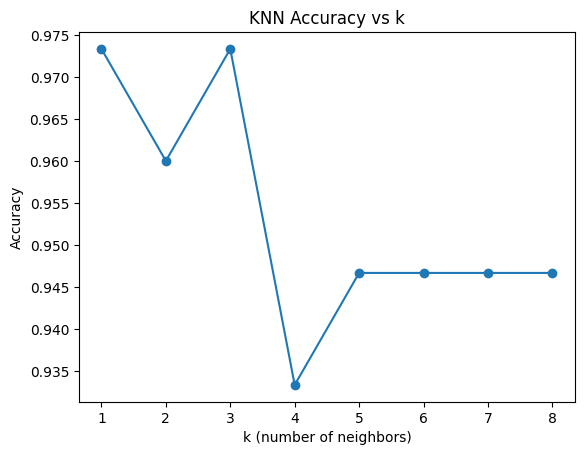


Best k = 1 with accuracy = 97.33%


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

K = [1, 2, 3, 4, 5, 6, 7, 8]
my_accs = []

for k in K:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    my_accs.append(acc)
    print(f"k = {k}, accuracy = {acc * 100:.2f}%")

# Plot accuracy vs k
plt.plot(K, my_accs, marker='o')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs k')
plt.show()

best_k = K[my_accs.index(max(my_accs))]
print(f"\nBest k = {best_k} with accuracy = {max(my_accs) * 100:.2f}%")


# KNN in Scikit-Learn

<img src="https://raw.githubusercontent.com/PyDataGBC/PyData2025/refs/heads/main/Lab_Week7_KNN/assets/Scikit-learn-flow.jpeg" width="500" hight="400" />

In [38]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.67%
